In [1]:
import os, sys, codecs
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline 

In [2]:
def build_word_vector_matrix(vector_file, n_words=None):
    '''Read a GloVe array from sys.argv[1] and return its vectors and labels as arrays'''
    np_arrays = []
    labels_array = []

    with codecs.open(vector_file, 'r', 'utf-8') as f:
        for i, line in enumerate(f):
            sr = line.split()
            labels_array.append(sr[0])
            np_arrays.append(np.array([float(j) for j in sr[1:]]))
            if n_words and i == n_words - 1:
                break
        return np.array(np_arrays), labels_array
            
# parse data and create embedding matrix and labels array
embeddings, labels = build_word_vector_matrix('../data/embeddings/2/vectors_d200.txt')

# create dictionaries from labels array for quick lookups
id_to_word = dict(zip(range(len(labels)), labels))
word_to_id = dict((v,k) for k,v in id_to_word.items())

Apply k-means with k clusters.

In [10]:
k = 50 # number of clusters
# Create KMeans model using all CPUs
kmeans_model = KMeans(init='k-means++', n_clusters=k, n_jobs=-1, n_init=10)
print('Running K-means clustering algorithm...')
kmeans_model.fit(embeddings)
print('Done.')

cluster_labels  = kmeans_model.labels_
cluster_inertia = kmeans_model.inertia_

Running K-means clustering algorithm...
Done.


Create `clusters` list and populate each element with the words from that cluster.

In [11]:
uniq_labels = list(set(cluster_labels))
# below expression is a nifty way to create 
# an array consisting of k empty arrays
clusters = [[] for _ in range(len(uniq_labels))]

print('{} labels created'.format(len(cluster_labels)))
print('{} unique labels'.format(len(clusters)))

for i, label in enumerate(cluster_labels):
    clusters[int(label)].append(id_to_word[i])


2211 labels created
50 unique labels


Print three random words from each cluster to help and identify the subject of the cluster.

In [12]:
# print three words from each cluster to get an idea 
# of what what that cluster might represent
print('CLUSTER INDEX             RANDOM WORDS FROM CLUSTER')
print('----------------------------------------------------------')
for i, cluster in enumerate(clusters):
    indexes = list(set([randint(0, len(cluster)) - 1 for _ in range(0, 3)]))
    words = [cluster[index] for index in indexes]
    print('#{}'.format(str(i).ljust(3)), *list(map(lambda w: w.rjust(17), words)))

CLUSTER INDEX             RANDOM WORDS FROM CLUSTER
----------------------------------------------------------
#0                Rfe7              Rfe7
#1                gxf3             gxf3+              exf3
#2                Rgd4             Rxb5+              Rba5
#3                Rfe5             Bxa6+              Nec8
#4                 Kd7               Kc6               Rh4
#5                Rxf7             Qxe6+             Qxf7+
#6               Qxg1+              Qxg1
#7               Nxb3+              Rxb3             Rxb3+
#8                Qb4+              Qc5+              Qd7+
#9                Bb5+                a6              Nbd2
#10                 a2              Nxa1             Qxa1+
#11               Qxg4              Qxe8              Qxe4
#12               cxb6              Nxc8              Qxc1
#13              Nxh2+              Ne1+
#14                d7+               c5+              Nb5+
#15               Nf8+              Neg5              Bd1+

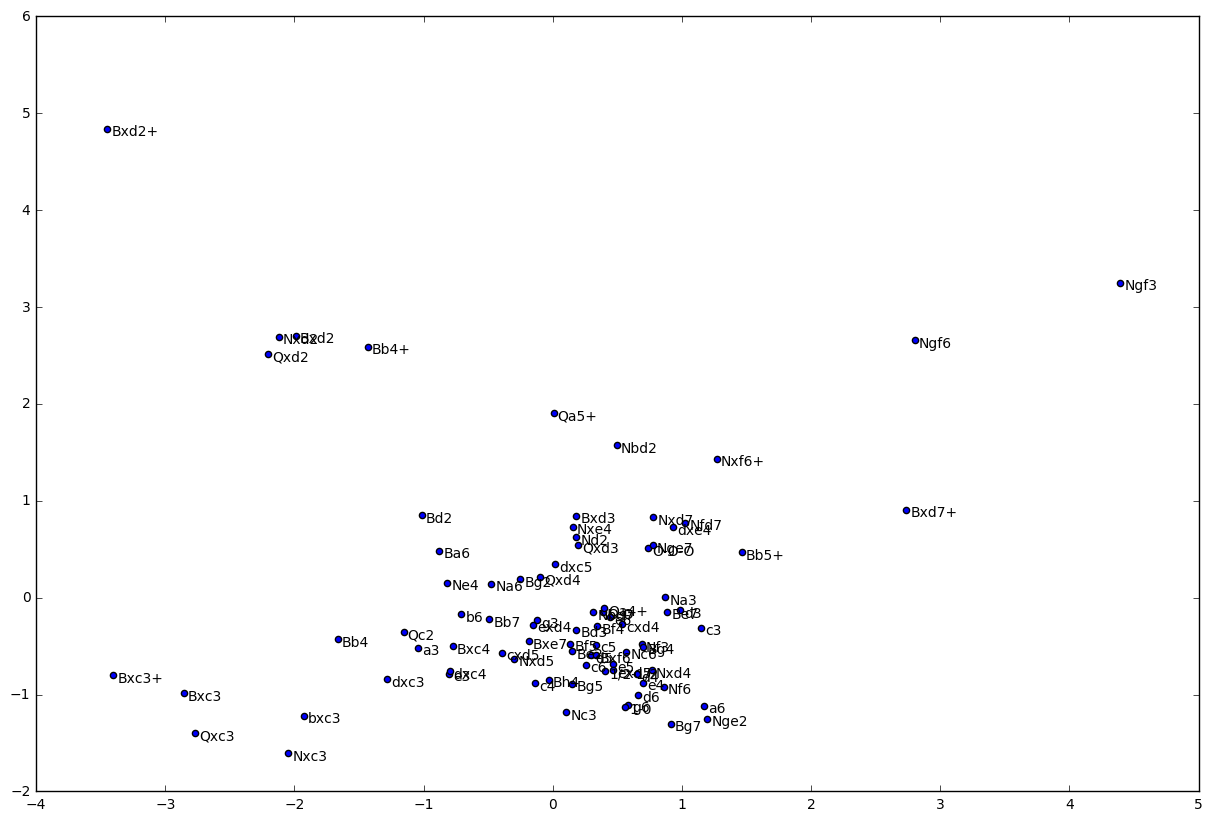

In [20]:
def fit_and_plot_pca(cluster):
    
    # extract the embeddings of only the words in the cluster
    indicies = [word_to_id[word] for word in cluster]
    cluster_embeddings = [embeddings[index] for index in indicies]

    pca = PCA(n_components=2)
    pca.fit(cluster_embeddings)
    reduced_dim = pca.transform(cluster_embeddings)
    # print(pca.explained_variance_ratio_)

    xs = reduced_dim[:, 0]
    ys = reduced_dim[:, 1]
    fig = plt.figure(figsize=(15, 10))
    plt.scatter(xs, ys, marker = 'o')
    for i, word in enumerate(cluster):
         plt.annotate(
             word,
             xy = (xs[i], ys[i]), xytext = (3, 3),
             textcoords = 'offset points', ha = 'left', va = 'top')
    
cluster = clusters[9] # select an index from the list above to visualize with PC
fit_and_plot_pca(cluster)
## Uncomment below to plot all k clusters
## WARNING: This can use a LOT of memory
# for i, cluster in enumerate(clusters):
#    fit_and_plot_pca(cluster)


In [19]:
# find the cluster that contains a particular move
move = '1-0'
for i, cluster in enumerate(clusters):
    if move in cluster:
        print('{} found in cluster {}'.format(move, i))
        break

1-0 found in cluster 9
